In [1]:
import pandas_datareader as pdr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pdr.get_data_yahoo('TATASTEEL.NS',start='2016-01-01',end='2020-12-31')

In [3]:
test_data=pdr.get_data_yahoo('TATASTEEL.NS',start='2021-01-01',end='2021-12-31')

In [4]:
train=list(df[:]['Close'])
test=list(test_data[:]['Close'])

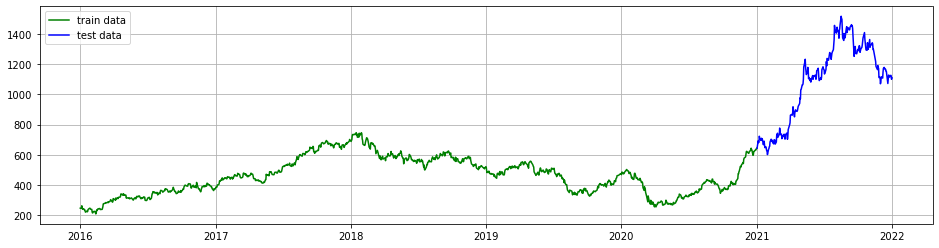

In [5]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot(df[:]['Close'],'green',label='train data')
plt.plot(test_data[:]['Close'],'blue',label='test data')
plt.legend()

p,d,q calculation

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
result=adfuller(df.Close.dropna())
print("AdY statistics",result[0])
print("p-value",result[1])

AdY statistics -2.1231189959016663
p-value 0.2353205163594871


d=no of differences,
p=pacf,
q=acf

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

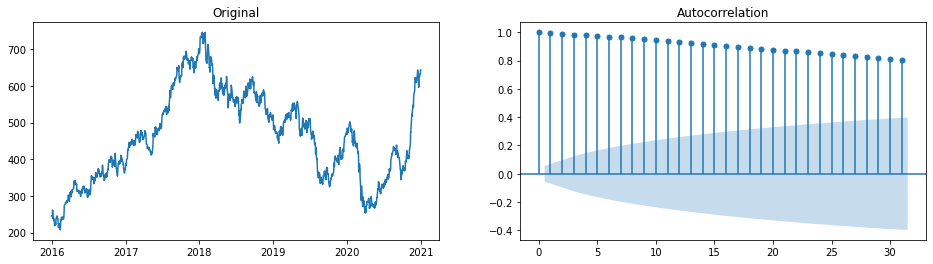

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close,ax=ax2);

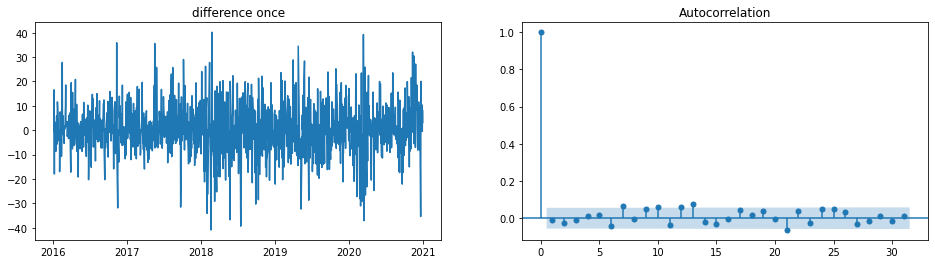

In [10]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")
plot_acf(diff,ax=ax2);

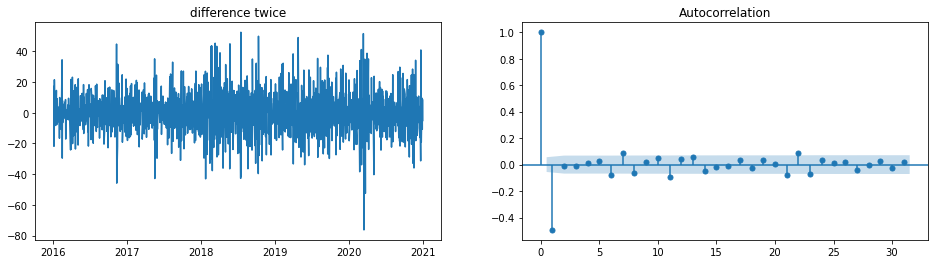

In [11]:
diff=df.Close.diff().diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference twice")
plot_acf(diff,ax=ax2);

inbuild library to find d value

In [12]:
from pmdarima.arima.utils import ndiffs

In [13]:
d=df.copy()
ndiffs(d.Close,test="adf")

1

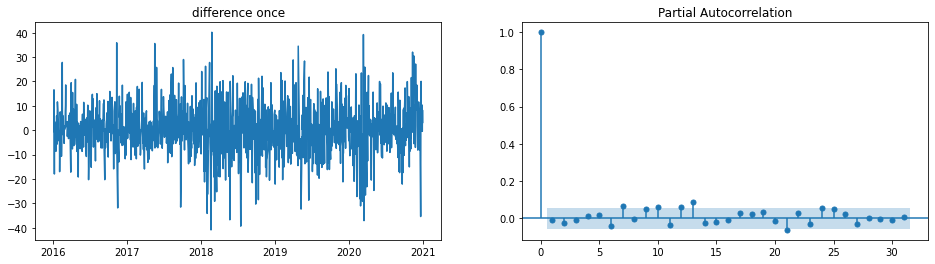

In [14]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")

plot_pacf(diff,ax=ax2);

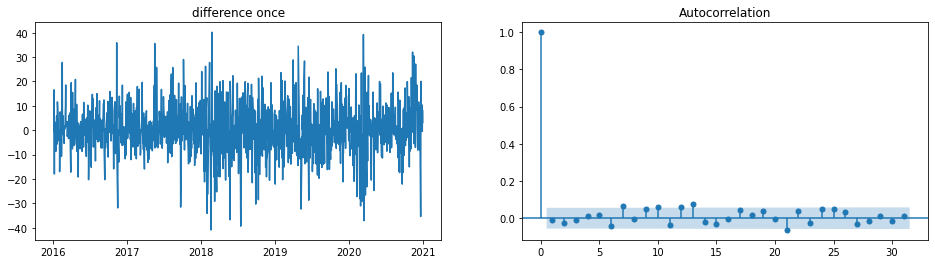

In [15]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")

plot_acf(diff,ax=ax2);

In [16]:
model_prediction=[]
n_test_obser=len(test)

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [19]:
for i in range(n_test_obser-20):
    model=ARIMA(train,order=(7,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=list(output[0])[0]
    model_prediction.append(yhat)
    actual_test_value=test[i]
    train.append(actual_test_value)
    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

In [20]:
length=len(test)

In [21]:
fore=[]
for i in range(20):
    model=ARIMA(train,order=(7,1,0))
    model_fit=model.fit()
    y=model_fit.forecast()
    train.append(test[length-20+i])
    fore.append(list(y[0])[0])
    

In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1480
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -6078.445
Method:                       css-mle   S.D. of innovations             14.703
Date:                Sun, 20 Mar 2022   AIC                          12174.889
Time:                        18:07:55   BIC                          12222.588
Sample:                             1   HQIC                         12192.671
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5781      0.384      1.504      0.133      -0.175       1.332
ar.L1.D.y      0.0474      0.026      1.826      0.068      -0.003       0.098
ar.L2.D.y     -0.0433      0.026     -1.673      0.094      -0.094       0.007
ar.L3.D.y     -0.0739      0.026     -2.849      0.004      -0.125      -0.023
ar.L4.D.y      0.0829      0.026      3.199      0.001       0.032       0.134
ar.L5.D.y      0.0156      0.026      0.601      0.548      -0.035       0.066
ar.L6.D.y     -0.0776      0.026     -2.996      0.003      -0.128      -0.027
ar.L7.D.y      0.0547      0.026      2.107      0.035       0.004       0.106
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2675           -0.5896j            1.3980           -0.4307
AR.2           -1.2675           +0.5896j            1.3980            0.4307
AR.3           -0.0514           -1.3795j            1.3805           -0.2559
AR.4           -0.0514           +1.3795j            1.3805            0.2559
AR.5            1.1642           -1.2187j            1.6854           -0.1286
AR.6            1.1642           +1.2187j            1.6854            0.1286
AR.7            1.7275           -0.0000j            1.7275           -0.0000
-----------------------------------------------------------------------------
"""

In [23]:
len(test)

248

graph between actual predicted and forecasted


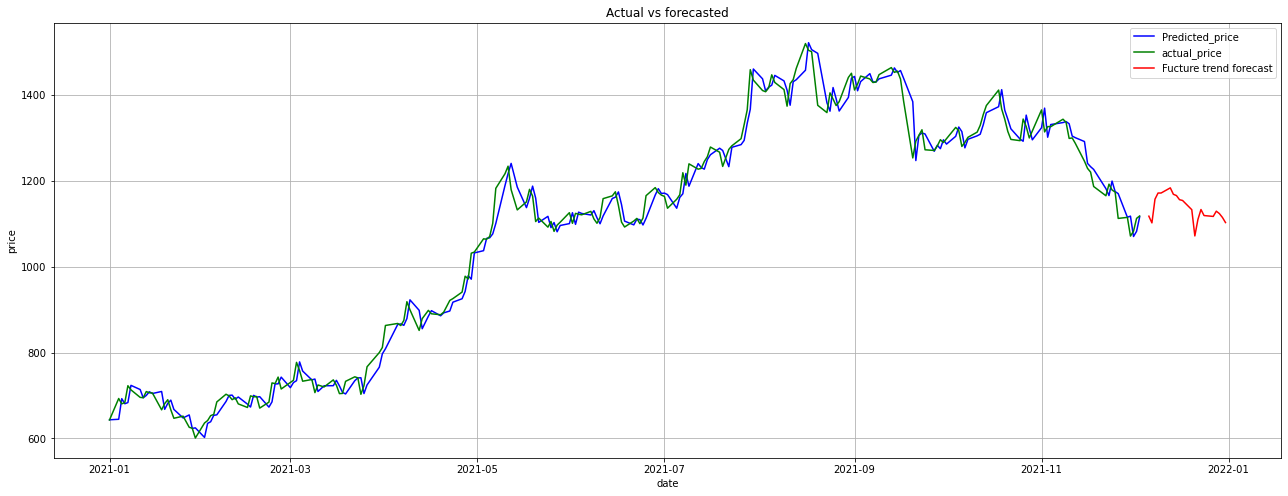

In [24]:
plt.figure(figsize=(22,8))
plt.grid(True)
data_range=test_data.index
plt.plot(data_range[:-20],model_prediction[:],color='blue',label='Predicted_price')
plt.plot(data_range[:-20],test[:-20],color='green',label='actual_price')
plt.plot(data_range[-20:],fore[:],color='red',label='Fucture trend forecast')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Actual vs forecasted')
plt.legend()


actual vs forecasted for 20 days

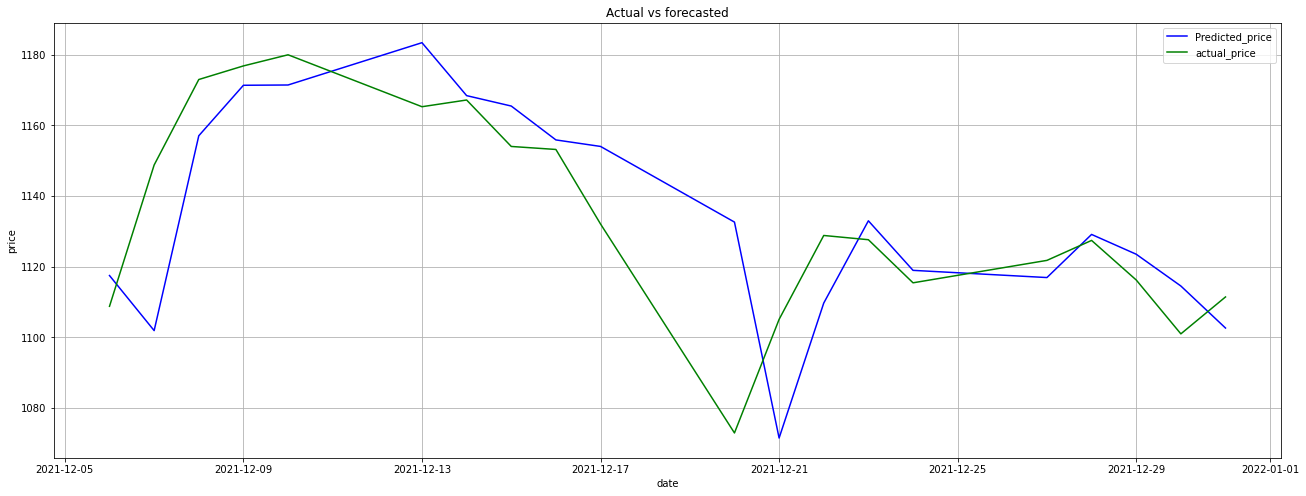

In [25]:
plt.figure(figsize=(22,8))
plt.grid(True)
data_range=test_data.index
plt.plot(data_range[-20:],fore[:],color='blue',label='Predicted_price')
plt.plot(data_range[-20:],test[-20:],color='green',label='actual_price')

plt.xlabel('date')
plt.ylabel('price')
plt.title('Actual vs forecasted')
plt.legend()


Error calculation

In [26]:
date=pd.to_datetime(data_range)

In [27]:
len(test)

248

In [28]:
dif=[]
for i in range(20):
    dif.append(test[length-20+i]-fore[i])

In [29]:
print ("{:<25} {:<25} {:<25} {:<38}".format('Date','Actual','Predicted','difference'))
for i in range(20):
   # print(test[228+i],"        ",ans[i], "        =", dif[i])
    print ("{}    {:<25} {:<25}=  {:<25}".format(data_range[length-20+i],test[length-20+i],fore[i],dif[i]))

Date                      Actual                    Predicted                 difference                            
2021-12-06 00:00:00    1108.800048828125         1117.5089726159738       =  -8.70892378784879        
2021-12-07 00:00:00    1148.800048828125         1101.922740076531        =  46.877308751594          
2021-12-08 00:00:00    1173.0                    1157.0762985052877       =  15.923701494712304       
2021-12-09 00:00:00    1176.8499755859375        1171.3706624403455       =  5.479313145591959        
2021-12-10 00:00:00    1180.0                    1171.4481844332581       =  8.55181556674188         
2021-12-13 00:00:00    1165.300048828125         1183.4252752311575       =  -18.125226403032457      
2021-12-14 00:00:00    1167.199951171875         1168.4380159792772       =  -1.2380648074022247      
2021-12-15 00:00:00    1154.050048828125         1165.4895802997733       =  -11.439531471648252      
2021-12-16 00:00:00    1153.199951171875         1155.90146

In [30]:
from sklearn.metrics import mean_squared_error
mean_squa=mean_squared_error(test[length-20:length],fore[:20])
mean_squa

450.97491831549195

In [31]:
import math
root_mean_squa=math.sqrt(mean_squa)
root_mean_squa

21.236170048186466